In [20]:
!unzip "/content/drive/My Drive/Colab Notebooks/cancer_data/cancer_dataset.zip" -d "/content/"

Archive:  /content/drive/My Drive/Colab Notebooks/cancer_data/cancer_dataset.zip
  inflating: /content/cancer_dataset/test.csv  
  inflating: /content/cancer_dataset/train.csv  


In [22]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [23]:
#importing dataset
train=pd.read_csv('cancer_dataset/train.csv')
test=pd.read_csv('cancer_dataset/test.csv')

In [67]:
X_train=train.drop('label',axis=1).values
y_train=train['label'].values

X_test=test.drop('label',axis=1).values
y_test=test['label'].values



In [68]:
print("X_train_shape",X_train.shape)
print("y_train_shape",y_train.shape)
print("X_test_shape",X_test.shape)
print("y_test_shape",y_test.shape)
print(y_test)

X_train_shape (750, 2500)
y_train_shape (750,)
X_test_shape (82, 2500)
y_test_shape (82,)
['Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant'
 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant'
 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant'
 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant'
 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant'
 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant'
 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal']


Actual image= Malignant


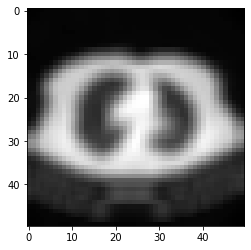

In [69]:
index=12
plt.imshow(X_train[index].reshape(50,50),cmap='gray')
print("Actual image=",y_train[index])



In [70]:
X_train=X_train.reshape(train.shape[0],50,50,1).astype('float32')
X_train=X_train/255.0
X_test=X_test.reshape(test.shape[0],50,50,1).astype('float32')
X_test=X_test/255.0


In [71]:
# Encoding the Dependent Variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
#1 for uninfected 0 for infected

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [72]:
#import libraries for CNN
import keras
from keras.models import Sequential
from keras.layers import  Conv2D,MaxPool2D,MaxPooling2D,BatchNormalization
from keras.layers import Dense,Dropout,Flatten



In [73]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.7))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 6, 64)         

In [74]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5382
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.5860
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.6542
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7136
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7652
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7573
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7827
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8135
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7676
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8334
Epoch 11/20
15/15 [

In [80]:
prediction=model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.1110 - accuracy: 0.9756


In [81]:
model.save("cancer_model.h5")

In [82]:
model1=keras.models.load_model("cancer_model.h5")

y_actual [1. 0.]
Predicted image=Malignant


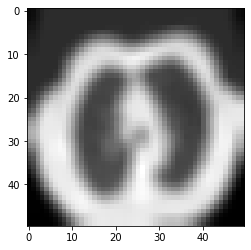

In [83]:
import numpy as np
index=12
plt.imshow(X_test[index].reshape(50,50),cmap='gray')
print("y_actual",y_test[index])
#print("Predicted", model1.predict([[X_test[index].reshape(1,50,50,1)]]).astype(float))
pred=model1.predict([[X_test[index].reshape(1,50,50,1)]]).astype(float)
if pred.argmax()==0:
  print("Predicted image=Malignant")
else:
  print("Predicted image=Normal")

